<a href="https://colab.research.google.com/github/Rmm6699/HW/blob/master/W1_TA_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [ ]:
def show_digits(imgs, preds=None):
    fig = plt.figure(figsize=(16, 10))
    for i in range(8):
        ax = fig.add_subplot(1, 8, i+1)
        ax.imshow(imgs[i].reshape(8, 8), cmap=plt.cm.gray)
        ax.set_axis_off()
        if preds is not None:
            ax.set_title('pred: {}'.format(preds[i]))
    plt.show()

## Data preprocessing & Split dataset

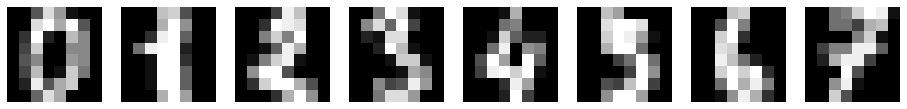

Size of dataset -> X: (1797, 64), Y: (1797,)
X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]
Y:
 [0 1]


In [ ]:
digits = datasets.load_digits()
show_digits(digits.data)
print('Size of dataset -> X: {}, Y: {}'.format(digits.data.shape, digits.target.shape))
print('X:\n', digits.data[:2])
print('Y:\n', digits.target[:2])

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(digits.data, digits.target, test_size=0.25, shuffle=True, random_state=2022)
train_x.shape, train_y.shape
print('Size of training dataset -> X: {}, Y: {}'.format(train_x.shape, train_y.shape))
print('Size of testing dataset  -> X: {}, Y: {}'.format(test_x.shape, test_y.shape))

Size of training dataset -> X: (1347, 64), Y: (1347,)
Size of testing dataset  -> X: (450, 64), Y: (450,)


## Basic Classifier Model

### 1. KNN (K-Nearest Neighbors, [doc.](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) 
*   n_neighbors: number of neighbors to use by default for k neighbors queries, default=5

Accuracy of testing dataset: 0.9778


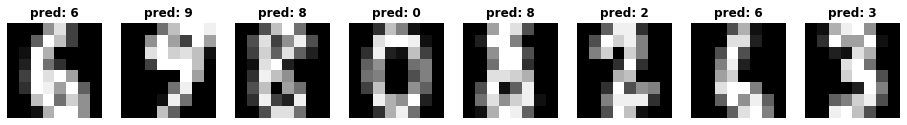

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
clf = KNeighborsClassifier(n_neighbors=5)

# Learn the digits on the train subset
clf.fit(train_x, train_y)

# Predict the value of the digit on the testing subset
preds = clf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, preds)
print('Accuracy of testing dataset: {:.4f}'.format(accuracy))

#  Visualize the first 8 test samples and show their predicted digit value in the title
show_digits(test_x, preds)

Confusion matrix:
 [[45  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  0  0]
 [ 0  0 40  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  1  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 51  1  0  0  2]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  1  0  0  0  0  0  0 39  0]
 [ 0  1  0  1  1  0  0  0  0 38]]


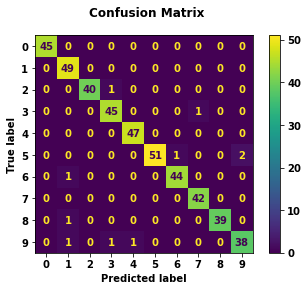

In [ ]:
# Confusion matrix visualization 
cm = ConfusionMatrixDisplay.from_estimator(clf, test_x, test_y)
cm.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n", cm.confusion_matrix)
plt.show()

### 2. Logistic regression ([doc.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))
*   penalty: Used to specify the norm used in the penalization, {l1, l2, elasticnet, none}, default=’l2’

Accuracy of testing dataset: 0.9378


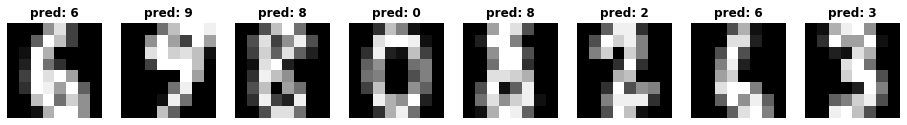

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
clf = LogisticRegression(penalty='none')

# Learn the digits on the train subset
clf.fit(train_x, train_y)

# Predict the value of the digit on the testing subset
preds = clf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, preds)
print('Accuracy of testing dataset: {:.4f}'.format(accuracy))

#  Visualize the first 8 test samples and show their predicted digit value in the title
show_digits(test_x, preds)

### 3. SVM (Support Vector Machines, [doc.](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC))
*   gamma: kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’, {scale, auto} or float, default=’scale’
*   C: regularization parameter, the strength of the regularization is inversely proportional to C, default=1.0
*   kernel: specifies the kernel type to be used in the algorithm, {linear, poly, rbf, sigmoid, precomputed}, default=’rbf’

Accuracy of testing dataset: 0.9778


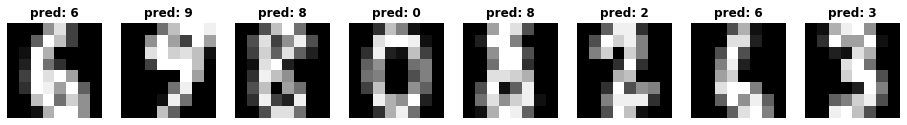

In [ ]:
from sklearn import svm

# Create the model
clf = svm.SVC(gamma='auto', C=1., kernel='linear')

# Learn the digits on the train subset
clf.fit(train_x, train_y)

# Predict the value of the digit on the testing subset
preds = clf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, preds)
print('Accuracy of testing dataset: {:.4f}'.format(accuracy))

#  Visualize the first 8 test samples and show their predicted digit value in the title
show_digits(test_x, preds)

### 4. Decision Tree ([doc.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
*   criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. {“gini”, “entropy”}, default=”gini”
*   max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Accuracy of testing dataset: 0.8422


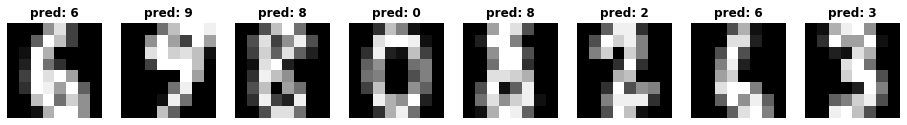

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
clf = DecisionTreeClassifier(max_depth=8, criterion='gini')

# Learn the digits on the train subset
clf.fit(train_x, train_y)

# Predict the value of the digit on the testing subset
preds = clf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, preds)
print('Accuracy of testing dataset: {:.4f}'.format(accuracy))

#  Visualize the first 8 test samples and show their predicted digit value in the title
show_digits(test_x, preds)

### 5. Random Forest ([doc.](https://scikit-learn.org/stable/modules/generated/sklearn.ensembleRandomForestClassifier.html))
*   n_estimators: the number of trees in the forest, default=100
*   max_depth: the maximum depth of the tree, default=None



Accuracy of testing dataset: 0.9689


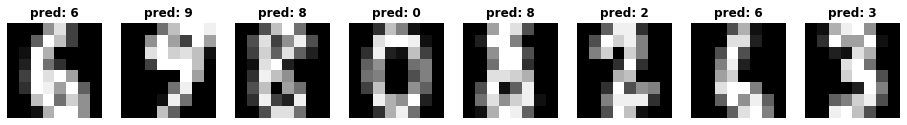

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
clf = RandomForestClassifier(n_estimators=100)

# Learn the digits on the train subset
clf.fit(train_x, train_y)

# Predict the value of the digit on the testing subset
preds = clf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, preds)
print('Accuracy of testing dataset: {:.4f}'.format(accuracy))

#  Visualize the first 8 test samples and show their predicted digit value in the title
show_digits(test_x, preds)

### 5. MLP (Multi-layer Perceptron classifier, [doc.](https://scikit-learn.org/stable/modules/generatedsklearn.neural_network.MLPClassifier.html))
*   hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer, default(100,)
*   activation: activation function, {identity, logistic, tanh, relu}, , default=’adam’
*   solver: optimizer, {lbfgs, sgd, adam}, default=’adam’
*   alpha: L2 penalty (regularization term) parameter, default=0.0001
*   batch_size: size of minibatches, default=’auto’

Accuracy of testing dataset: 0.9733


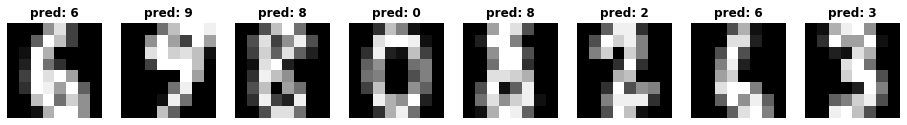

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create the model
clf = MLPClassifier(hidden_layer_sizes=(512, 128, 32), learning_rate_init=1e-4, activation='relu', solver='adam', batch_size=64, max_iter=100, random_state=1)

# Learn the digits on the train subset
clf.fit(train_x, train_y)

# Predict the value of the digit on the testing subset
preds = clf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, preds)
print('Accuracy of testing dataset: {:.4f}'.format(accuracy))

#  Visualize the first 8 test samples and show their predicted digit value in the title
show_digits(test_x, preds)

## Gradient Boosting Models

### 1. XGBoost ([doc.](https://xgboost.readthedocs.io/en/latest/python/python_api.html))
*   n_estimators: number of boosting rounds
*   learning_rate: boosting learning rate
*   max_depth: maximum tree depth for base learners
*   objective: specify the learning task and the corresponding learning objective or a custom objective function to be used

[21:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of testing dataset: 0.9556


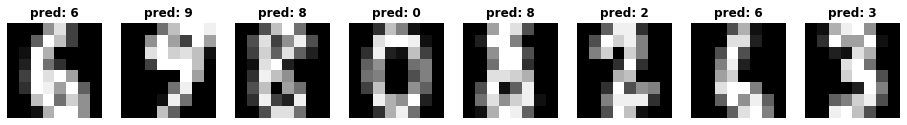

In [ ]:
from xgboost import XGBClassifier

# Create the model
clf = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, objective='multi:logistic', use_label_encoder=False)

# Learn the digits on the train subset
clf.fit(train_x, train_y)

# Predict the value of the digit on the testing subset
preds = clf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, preds)
print('Accuracy of testing dataset: {:.4f}'.format(accuracy))

#  Visualize the first 8 test samples and show their predicted digit value in the title
show_digits(test_x, preds)

### 2. LightGBM ([doc.](https://lightgbm.readthedocs.io/en/latest/Parameters.html))
*   objective: specifies the application of your model, {regression, binary, multiclass},default='regression'
*   boosting: defines the type of algorithm you want to run, {gdbt, rf, dart, goss} default=gdbt
*   learning_rate : controls the magnitude of this change in the estimates, typical values: 0.1, 0.001, 0.003…
*   max_depth: the maximum depth of tree. This parameter is used to handle model overfitting. If you feelthat your model is overfitted, you should to lower max_depth

Accuracy of testing dataset: 0.9622


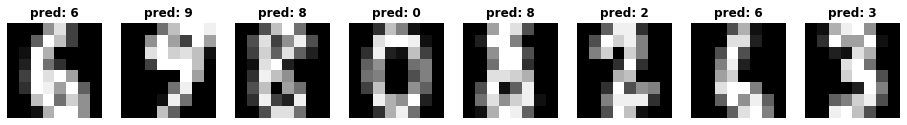

In [ ]:
from lightgbm import LGBMClassifier

# Create the model
clf = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, objective='multiclass', boosting_type='gbdt')

# Learn the digits on the train subset
clf.fit(train_x, train_y)

# Predict the value of the digit on the testing subset
preds = clf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, preds)
print('Accuracy of testing dataset: {:.4f}'.format(accuracy))

#  Visualize the first 8 test samples and show their predicted digit value in the title
show_digits(test_x, preds)

### 3. CatBoost ([doc.](https://catboost.ai/docs/concepts/python-reference_parameters-list.html#python-reference_parameters-list))
*   iterations: the maximum number of trees that can be built when solving machine learning problems, default=1000
*   learning_rate: the learning rate, used for reducing the gradient step
*   depth: depth of the tree, default=6
*   loss_function: the metric to use in training, the specified value also determines the machine learning problem to solve


Accuracy of testing dataset: 0.9689


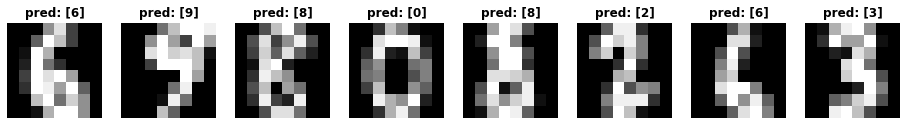

In [ ]:
from catboost import CatBoostClassifier

# Create the model
clf = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, loss_function='MultiClass', verbose=False)

# Learn the digits on the train subset
clf.fit(train_x, train_y)

# Predict the value of the digit on the testing subset
preds = clf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, preds)
print('Accuracy of testing dataset: {:.4f}'.format(accuracy))

#  Visualize the first 8 test samples and show their predicted digit value in the title
show_digits(test_x, preds)

## Performance Evaluation

### 1. Split train/valid/test sets
*   已分割 training dataset (75%, 1347 samples) 與 testing dataset (25%, 450 samples)
*   再從training dataset再分割成
    *   train: 90%
    *   validation: 10% 
*   訓練 train set 並使用 validation set 驗證

In [ ]:
valid_scores = []
for i in range(10):
    x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.10, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    
    preds = knn.predict(x_valid)
    score = accuracy_score(y_valid, preds)
    valid_scores.append(score)
valid_scores = np.array(valid_scores) 

print('Accuracy of every iterations: ', valid_scores.round(4))
# use average accuracy as an estimate of out-of-sample accuracy
print('Average accuracy: ', valid_scores.mean().round(4))

Accuracy of every iterations:  [0.9778 1.     0.9926 0.9926 0.963  0.9926 0.9926 1.     0.9778 0.9926]
Average accuracy:  0.9881


### 2. Cross Validation
  (1)  方法：透過不同的訓練、測試資料組合，代入模型中作預測及驗證

  (2)  效果：提供更多數據去作驗證，作為模型選擇判斷的依據

  (3)  目的：衡量模型的表現、調整參數

  (4)  包含：

  *   Resubstitution (自我一致性評估法)：使用相同的資料進行訓練和測試

  *   Holdout CV：隨機取得p%資料為Training data、剩下的 (1-p)% Testing data
  
        ![連結文字](https://drive.google.com/uc?id=18a01qRmpDkXJwUMOwv0wdqUslvOkm6OG)
  *   Leave-one-out CV (LOOCV)：每次都將一筆資料視為Testing data，剩下的為Training data

        ![連結文字](https://drive.google.com/uc?id=1qJE-8_PBuk1bzHEWJMSRIoyqYt58ZUad)
  *   K-fold CV：將資料隨機平均分成k個集合，某一個集合當做Testing data，剩下的k-1個集合為Training data
  
        ![連結文字](https://drive.google.com/uc?id=1gQJS5gK22zOHP7WuMQtreOQtVBGsFPiQ)

  K-fold Cross Validation 執行流程:
  *   Split the dataset into K equal partitions (or "folds").
  *   Use fold 1 as the testing set and the union of the other folds as the training set.
  *   Calculate testing accuracy.
  *   Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
  *   Use the average testing accuracy as the estimate of out-of-sample accuracy.

      ![連結文字](https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/8b8efe556d545ac12a76181ca0a2c3e52d3060b3/images/07_cross_validation_diagram.png)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^85} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^15} {}\t {:^30}'.format(iteration, data[0], str(data[1])))

Iteration                               Training set observations                               Testing set observations
       1        [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]	          [0 1 2 3 4]          
       2        [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]	          [5 6 7 8 9]          
       3        [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]	        [10 11 12 13 14]       
       4        [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]	        [15 16 17 18 19]       
       5        [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]	        [20 21 22 23 24]       


In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

valid_scores = []
for train_idx, valid_idx in kf.split(train_x):
    cv_train_x, cv_train_y = train_x[train_idx], train_y[train_idx]
    cv_valid_x, cv_valid_y = train_x[valid_idx], train_y[valid_idx]
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(cv_train_x, cv_train_y)
    
    preds = knn.predict(cv_valid_x)
    score = accuracy_score(cv_valid_y, preds)
    valid_scores.append(score)
valid_scores = np.array(valid_scores) 

print('Accuracy of every iterations: ', valid_scores.round(4))
# use average accuracy as an estimate of out-of-sample accuracy
print('Average accuracy: ', valid_scores.mean().round(4))

Accuracy of every iterations:  [0.9852 0.9704 0.9926 0.9926 0.9778 0.9852 0.963  1.     1.     0.9925]
Average accuracy:  0.9859


The simplest way to use cross-validation is to call the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) helper function on the estimator and the dataset.

  *   cv: determine the cross-validation splitting strategy (like parameter k in K-fold)
  *   scoring: including {AUC, accuracy, precision, recall, MAE, MSE, RMSE...}, see the documentation of callable function [(link)](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)



In [ ]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
valid_scores = cross_val_score(knn, train_x, train_y, cv=KFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')
print('Accuracy of every iterations: ', valid_scores.round(4))

# use average accuracy as an estimate of out-of-sample accuracy
print('Average accuracy: ', valid_scores.mean().round(4))

Accuracy of every iterations:  [0.9852 0.9704 0.9926 0.9926 0.9778 0.9852 0.963  1.     1.     0.9925]
Average accuracy:  0.9859


### 3. Metrics
  (1) MSE (Mean Squared Error): [sklearn.metrics.mean_squared_error(y_true, y_pred, squared=True)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

   <img src="https://drive.google.com/uc?id=1C3d8KZjFrKAYyCjfyc2dvBqoQVwnEhtI" width="300" />


  (2) MAE (Mean Absolute Error): [sklearn.metrics.mean_absolute_error(y_true, y_pred)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

  <img src="https://i.imgur.com/m3l77On.png" width="300" />

  (3) RMSE (Root Mean Squared Error): [sklearn.metrics.mean_squared_error(y_true, y_pred, squared=False)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

  <img src="https://drive.google.com/uc?id=17HHID04sFs22VIpxYiUkLtVthsp2zay9" width="300" />


  (4)Precision: [sklearn.metrics.precision_score(y_true, y_pred)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)

  ![連結文字](https://drive.google.com/uc?id=1yptUYDnLKQK_N6PaG9c1-tCZzxlrBquo)


  (5) Recall: [sklearn.metrics.recall_score(y_true, y_pred)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

  ![連結文字](https://drive.google.com/uc?id=15Do95o0Jb52c_zw7uhbgnvLW0RJgB7p3)


  (6) AUC (Area under the ROC Curve): [sklearn.metrics.auc(y_true, y_pred)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

## Hyperparamer Tuning

### 1. Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

cnt = 1
for i in param_grid.values():
    cnt *= len(i)
print('search times:', cnt)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
search times: 60


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy')

# fit the grid with data
grid.fit(train_x, train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.988132,0.007555,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.988132,0.007555,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.982941,0.010497,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.988132,0.007555,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.988889,0.010075,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.988889,0.010075,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.983693,0.011844,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.988889,0.009515,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.985920,0.011686,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.985920,0.011686,"{'n_neighbors': 5, 'weights': 'distance'}"


In [ ]:
# examine the best model
print(grid.best_score_.round(4))
print(grid.best_params_)

# make predictions of grid search model
preds = grid.predict(test_x)
accuracy = accuracy_score(test_y, preds)
print('\nAccuracy of grid search model: ', accuracy.round(4))

0.9889
{'n_neighbors': 3, 'weights': 'uniform'}

Accuracy of grid search model:  0.98


In [ ]:
# n_iter=10
from sklearn.model_selection import RandomizedSearchCV

RSCV = RandomizedSearchCV(knn, param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=1), scoring='accuracy', n_iter=10, random_state=5)
RSCV.fit(train_x, train_y)
pd.DataFrame(RSCV.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.982952,0.011002,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.969574,0.008379,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.973300,0.013304,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.965119,0.011491,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.963626,0.011708,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.985915,0.009034,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.972543,0.008117,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.974782,0.012014,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.984428,0.007716,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.975522,0.010479,"{'weights': 'uniform', 'n_neighbors': 15}"


In [ ]:
# examine the best model
print(RSCV.best_score_.round(4))
print(RSCV.best_params_)

# make predictions of random search model
preds = RSCV.predict(test_x)
accuracy = accuracy_score(test_y, preds)
print('\nAccuracy of grid search model: ', accuracy.round(4))

0.9859
{'weights': 'distance', 'n_neighbors': 10}

Accuracy of grid search model:  0.9778


## Summary
1. Data preprocessing & Split dataset
2. Basic Classifier Models: KNN, Logsitic Regression, Decision Tree, Random Forest, Support Vector Machine, MLP
3. GBDT Models: XGBoost, LightGBM, CatBook
4. Performance Evaluation: 
    * Split train/validation/test sets
    * Cross validation (K-fold cv)
    * Metric (MSE, MAE, RMSE, accuracy, precision, recall, AUC)
5. Hyperparamer Tuning:
    * Grid Search cv
    * Randomized Search cv